<a href="https://colab.research.google.com/github/Jibby2k1/ML4Music/blob/main/Stage_1_Filter_Investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### README:

First, this notebook is only possible because of UF's professor Dr. Wong - I was heavily guided by his notes and all acknowledgements go to him and his kindness. For his notes, refer to his GitHub page:
https://tanfwong.github.io/dsp_notes/ch6/firdesign.html

This is a notebook describing the few experiments and usage of python for implementing filters.

Most of the packages are built-into MATLAB, but to make this more accessible and coder friendly, we will be working with the **scipy** library in python:

https://docs.scipy.org/doc/scipy/reference/signal.html

### Signals

#### Motivation

Why do we care about signals? Signals are the way that any living organism is able to make sense of the world around it. What you perceive with your eyes is a signal, what you listen to with your ears is a signal, what you feel with your hands is a signal. Signals exist everywhere and make up our existence, so being able to inerpret these signals is essential in order to advance as a society.

#### Some Insights

To be able to interpret signals, we need to be able to handle the inputs that represent the world. This is generally a difficult task, as using signals that are analogous to the world can be really complex and intense to handle in real-time, however we have taken many steps to get closer to handling most signals, and here's why:

1) Analog Transducer: The analog transducer enabled the ability to convert a signal of one kind of energy to a signal of electric energy.

2) Analog-to-Digital Conversion: Computers are really fast, the ability to sample analog transducers at a very fast rate has allowed us to express the signals in a digital form.

3) Computers: Computers are really, Really, REALLY fast! They are capable of sampling at very high rates reliably, which can tell us a lot of information about a signal, achieving rates which can appear to be continuous (as opposed to discrete).

Therefore, since we are able to use computers to essentially mimic the world, we can process and interpret signals for meaningful outputs.

In this notebook, the goal is to teach students as much as possible about signals.

#### Continuous Time Fourier Transform

Let's assume for some signal x, that:

$ x(t) \longleftrightarrow X(f) $

The definition of this transformation is:

$ \mathcal{F} \{ x(t) \} = \int_{t=-\infty}^{\infty} x(t)  e^{-j 2π ft} dt $

The reason for this lies in euler's theorem:

1) $e^{j \phi} = cos(\phi) + j sin(\phi)$

and orthonormality:

##### Orthonormality
Note: Orthonormality means that the components involved in a dot product are orthogonal to each-other, in a broader sense, they do not share overlapping information. I.E. in a normal cartesian plane, content in the y-direction are only allocated in the second slot of a point (0, y), whereas content in the x-direction are only allocated in the first slot of a point (x, 0).

Taking the dot product of these two results in $ \\ x \cdotp y = (x, 0) \cdotp (0, y) = x*0 + 0*y = 0$

For functions,very similar ideas can be observed, however functions tend to be continuous. To measure similarity between 2 functions, we can measure the similarity between the functions by multiplying them. There is a niche that arises with complex functions, specifically when it comes to phase.

Remember that complex numbers can be represented as $A e^{jwt + \phi }$ When we take the product of the 2 functions, the magnitudes will multiply, however their phases will sum, which is not desireable. Since we want a measure of how "in-sync" the functions are, what we want to do is instead multiply by the conjugate of one of the functions, which will still multiply the magnitudes, but also express how "out-of-phase" the functions are.

2) $ \hat{a} · \hat{b} $ for discrete vectors, is synonymous to $ \int a(x) b^*(x) $ for continuous functions.

The way to interpret the integral is thus that we are finding the similarity between the function $x(t)$ and the complex sinusoid with frequency f. Since f is also a continuous variable, it is clear that we can find magnitude and phase information about frequency content in a signal!

The inverse of this transformation is:

$ \mathcal{F}^{-1} \{ X(f) \} = \int_{t=-\infty}^{\infty} X(f)  e^{j 2π ft} df $

With this, an analog signaling system is possible (i.e. AM, FM, PM Radio), since we can send a signal and recover it, as long as the communicators have agreed upon desired signal frequency content.

While this is an amazing discovery for analog signals, it is very difficult for computers to comprehend analog signals the way that we comprehend them. To account for this, there is a method to implement a Discrete Time Fourier Transform!

#### Discrete Time Fourier Transform

DTFT is the primary development that allows us to deal with signals using computers. To capture a signal in theory, we would need an infinite number of points to describe the signal, which is not possible yet. Therefore, to address this, we are able to discretize, or sample signals using computers, and process that data that is collected to generate meaningful output.

However, now that we have a discontinuous signal, it is impossible to evaluate an integral (refer to Continuous Time Fourer Tranform), therefore we must instead apply a Discrete Time Fourier Transform. Let's refer to the integral and think about how it would be possible to discretize it:

$ \mathcal{F} \{ x(t) \} = \int_{t=-\infty}^{\infty} x(t)  e^{-j 2π f t} dt $

Changes to make:

1) Signal is now discrete, a way to express this is to instead use $x[t]$ to express x, which indicates that t must be an integer value.

2) Since x[t] is discrete, we cannot integrate over this, instead we could possibly take the sum over the values that we encounter, still multiplied by $ e^{-j 2π ft} $ .

3) Since x[t] is discrete, we are sampling a real signal at some frequency $f_s$, according to Nyquist's theorem: $f_n ≤ f_s/2 $, which states that the highest detectable frequency in a discrete signal $f_n$ is half of the sampling frequency.

Combining these ideas:

$ x[t] \longleftrightarrow X(f) $

Forward DTFT: $ \mathcal{F} \{ x[t] \} = \sum_{t=-\infty}^{\infty} x[t]  e^{-j 2π \hat{f} t}$

Inverse DTFT: $ \mathcal{F}^{-1} \{ X(\hat{f}) \} = \int_{t=-\frac{1}{2}}^{\frac{1}{2}} X(\hat{f})  e^{j 2π \hat{f}t} df$

*For now, we will overlook the reasons for which we can convert from a discrete time domain to a continuous frequency domain, but if the intuition from the integral to the sum makes sense, this should hopefully not haunt you.

### Designing FIR Filters

For this section we need to look at filter design in the scipy.signal package. There are many approaches to filtering, let's start with analyzing FIR vs IIR filters.

**FIR Filters** are filters without any feedback, meaning that they only use current and past data as inputs to generate an output. This is not to be confused with using past outputs as inputs as well, this would make an **IIR filter**.

There are a few methods to designing FIR filters. If we know the ideal magnitude response, generating an FIR filter is fairly straight forward.

*Reference the above in for more in-depth details, but I will try to explain this to the best of my ability.

To summarize Dr. Wong's github page there are 3 main considerations for FIR filter design:

#### Design by Windowing

##### Choose a Window

Kaiser window is a very strong window choice because there are 2 tunable hyperparameters. To find the desired parameters, there are many approches to take - historically, many mathematicians tried designing optimal filter parameters algebraically. In reality, they tend to work but do not always satisfy the intended criteria of the filter.

The parameters to worry about when generating a filter are the intended $w_p$, as well as the ripple tolerances for passband and stopband $\delta_p$ and $\delta_s$.

For simplicity, we will resort to using the pre-defined formulas for generating filter order and parameters, however we will see later how to address incorrect filter designs.

##### Design Ideal Magnitude response for filter

This depends on personal choice, it is possible to make a filter, an amplifier, and etc. dependong on the person's needs. For us, we want a low-pass filter, so we start by specifying: $ |H_d(w)| = 1 $ when $w ≤ w_p$ and $|H_d(w)|$ when $w_p \lt w \le \pi $

For our sake, the desired Ideal Magnitude response corresponds with a $ H_d(w) = e^{-jw \frac{M}{2}}$

Taking the IFT: $h_{LP}[n] = \frac{sin(w_{LP}(n-\frac{M}{2}) )}{\pi(n-\frac{M}{2})}$

*** If we use a unique Ideal Magnitude response, we could use a function like IFFT to generate the filters. Typically, this will yield a NaN value into this middle of the filter, but we can replace this with the L'hopital's approximation of this value.

##### Element-wise multiply Window with Ideal Magnitude response.

Then, we make:

$y[n] = x[n] h_d[n]$

Which is the filtered signal!

##### Validate that specifications are met.

As mentioned previously, these formulas for determining filter order can be wrong, therefore we must manually (or autonomously) check that the specifications do actually work.

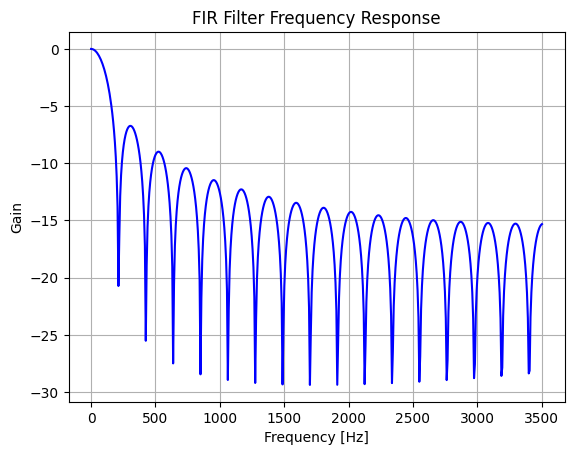

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiserord, firwin, freqz, lfilter, stft
from scipy.fft import fft, ifft, fftfreq
import librosa

# Sampling frequency
fs = 44100.0

# Desired frequency response specifications
nyquist = 0.5 * fs  # Nyquist frequency
cutoff_freq = 200.0  # Cutoff frequency of the filter
passband_ripple = 0.1  # Passband ripple in dB
stopband_attenuation = 10.0  # Stopband attenuation in dB

# Calculate the Kaiser window parameters using kaiserord
num_taps, beta = kaiserord(stopband_attenuation, (cutoff_freq / nyquist))

# Design the FIR filter using the Kaiser window
taps = firwin(num_taps, cutoff_freq, window=('kaiser', beta), fs=fs)

# Plot the frequency response of the filter
w, h = freqz(taps, fs=fs)
plt.plot(w / (2 * np.pi), 10 * np.log10(np.abs(h)), 'b')
plt.title('FIR Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.show()


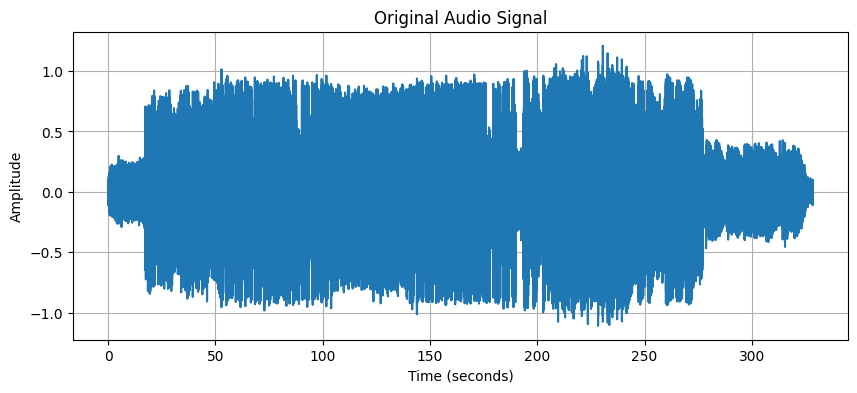

In [ ]:
file_path = 'sdp.mp3'  # Replace with the actual path to your audio file
audio_signal, sampling_rate = librosa.load(file_path, sr=None)
time = np.arange(0, len(audio_signal)) / sampling_rate

# Plot the original audio signal
plt.figure(figsize=(10, 4))
plt.plot(time, audio_signal)
plt.title('Original Audio Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

We would like to see the frequencies present in this audio signal. To do this, we need to apply the FFT to the signal, or alternatively the STFT if we wanted to see frequencies at certain times throughout the song.

In [ ]:
w, h = freqz(audio_signal, fs=fs)

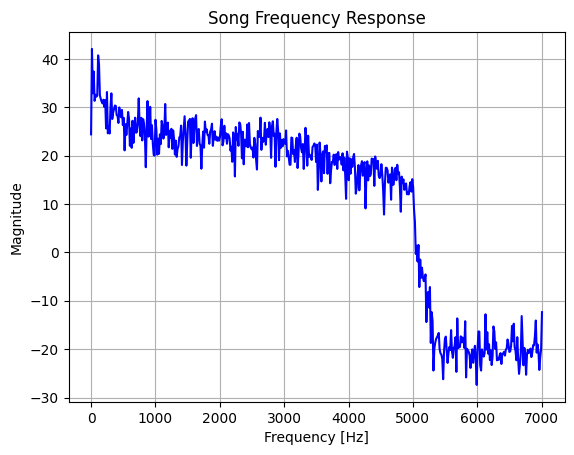

In [ ]:
# Plot the frequency response of the audio

plt.plot(w / (np.pi), 10 * np.log10(np.abs(h)), 'b')
plt.title('Song Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

In [ ]:
# Apply the FIR filter to the input signal
output_signal1 = lfilter(taps, 1.0, audio_signal)

In [ ]:
from scipy.io.wavfile import write

audio_data_normalized = np.int16(output_signal1 * 32767)
# Save the array as a WAV file
output_file1 = 'output1.wav'
write(output_file1, sampling_rate, audio_data_normalized)

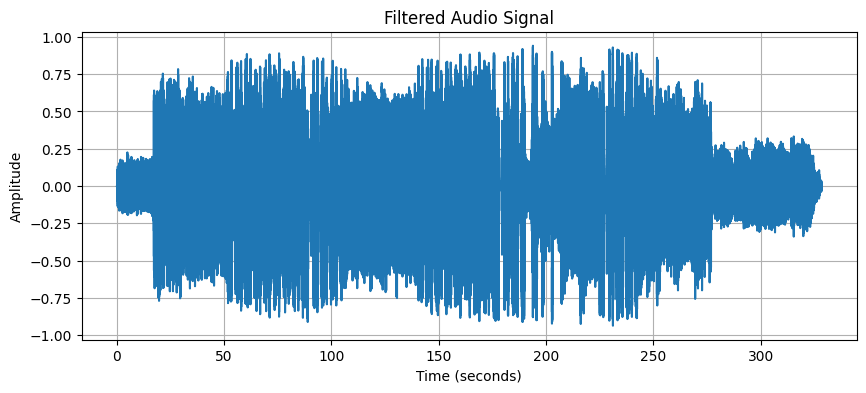

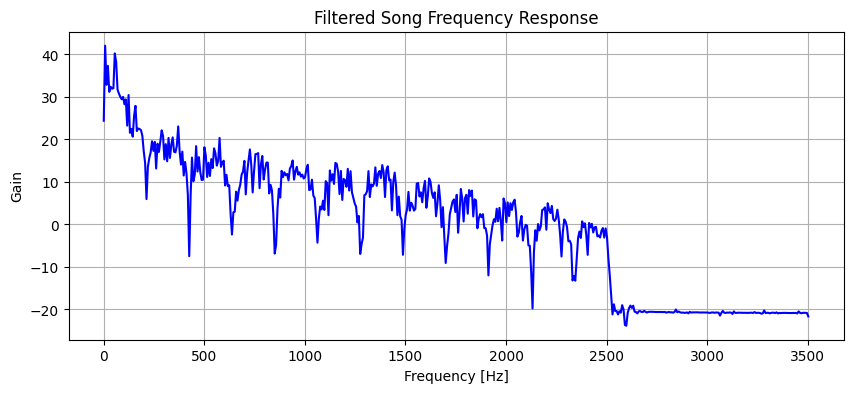

In [ ]:
# prompt:

# Plot the filtered audio signal
plt.figure(figsize=(10, 4))
plt.plot(time, output_signal1)
plt.title('Filtered Audio Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot the magnitude spectrum of the filtered audio signal
plt.figure(figsize=(10, 4))
# Plot the frequency response of the filter
w, h = freqz(output_signal1, fs=fs)
plt.plot(w / (2*np.pi), 10 * np.log10(np.abs(h)), 'b')
plt.title('Filtered Song Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.show()




---



#### 3. Equirriple Design

First, we need to undestand the frequencies we will be dealing with when working with music. Typically when recording songs, the sampling rate is 44.1kHz, this wil set a hard boundary for the highest frequency we will ever distinguishably hear.

Note*** we calculate the nyquist frequency because all frequency content generated over this frequency will be aliased and unusable.

Next, we need to understand the range of music we hope to use as features for any kind of music data processing.

https://www.masteringthemix.com/blogs/learn/understanding-the-different-frequency-ranges

According to this website, we can see that bass will typically occur in the 20-250 Hz range, and is mostly distinguishable from all other sounds. We will use bass as one of the features for our system, therefore a low-pass filter will be highly desireable.


#### Remez Low-Pass Filter

In [ ]:
nt = int(np.round(num_taps/1.5))
print(nt)

22


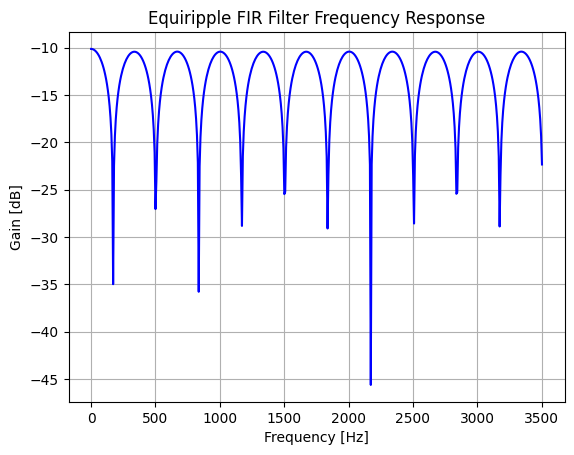

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import remez, freqz

# Parameters for the equiripple filter design
fs = 44100.0
cutoff_freq = 20.0
transition_width = 230.0  # Width of the transition band in Hz

# Calculate the number of taps for the equiripple filter design
nyquist = 0.5 * fs

# Design the equiripple FIR filter
#we are using the kaiser # of taps
taps = remez(numtaps = nt,
             bands = [0, cutoff_freq, (cutoff_freq + transition_width), nyquist],
             desired = [1, 0],
             weight = [1, 10], #this prioritizes minimizing error in the stopband
             fs=fs,
             maxiter = 1000)

# Plot the frequency response of the equiripple filter
w, h = freqz(taps, fs=fs)
plt.plot( w / (2 * np.pi), 10 * np.log10(np.abs(h)), 'b')
plt.title('Equiripple FIR Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid()
plt.show()


In [ ]:
# Apply the FIR filter to the input signal
output_signal2 = lfilter(taps, 0.2, audio_signal)

In [ ]:
audio_data_normalized2 = np.int16(output_signal2 * 32767)
# Save the array as a WAV file
output_file2 = 'output2.wav'
write(output_file2, sampling_rate, audio_data_normalized2)

In [ ]:
w, h = freqz(output_signal2, fs=fs)

In [ ]:
# Plot the filtered audio signal
plt.figure(figsize=(10, 4))
plt.plot(time, output_signal2)
plt.title('Filtered Audio Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot the frequency response of the audio
plt.figure(figsize=(10, 4))
plt.plot(w, 10 * np.log10(np.abs(h)), 'b')
plt.title('Filtered Song Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

#### Remez Band-Pass Filter

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import remez, freqz

# Parameters for the bandpass filter design
fs = 44100.0
passband = [60.0, 200.0]  # Passband frequency range
stopband_attenuation = 60.0
transition_width = 30.0  # Width of the transition band in Hz

# Calculate the order of the remez filter using remezord
nyquist = 0.5 * fs
delta_f = transition_width / nyquist

In [ ]:
[0, passband[0] - transition_width, passband[0], passband[1], passband[1] + transition_width, nyquist]

In [ ]:
# Design the remez FIR filter
taps = remez(numtaps = num_taps*2,
             bands = [0, passband[0] - transition_width, passband[0], passband[1], passband[1] + transition_width, nyquist],
             desired = [0, 1, 0],
             weight = [1, 100, 1], #this is the most important, please investigate
             fs=fs,
             maxiter = 1000)

# Plot the frequency response of the remez filter
w, h = freqz(taps, worN=8000, fs=fs)
plt.plot(w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Remez Bandpass FIR Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid()
plt.show()


In [ ]:
# Apply the FIR filter to the input signal
output_signal3 = lfilter(taps, 1.0, audio_signal)

audio_data_normalized3 = np.int16(output_signal3 * 32767)
# Save the array as a WAV file
output_file3 = 'output3.wav'
write(output_file3, sampling_rate, audio_data_normalized3)

### Designing IIR Filters

#### Butterworth Filter



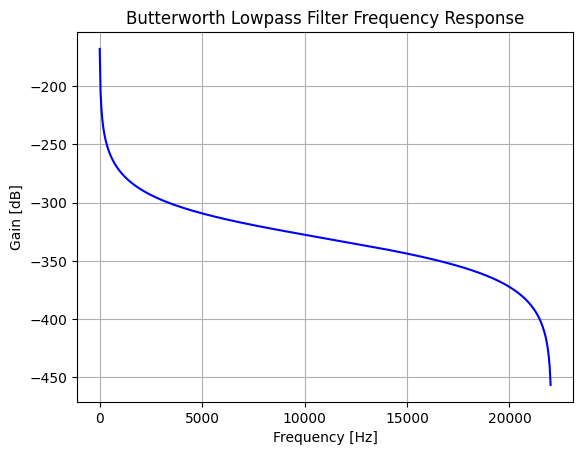

<ipython-input-19-80a9b7199567>:27: RuntimeWarning: overflow encountered in multiply
  audio_data_normalized4 = np.int16(output_signal4 * 32767)


In [ ]:
from scipy.signal import butter
# prompt: butterworth filter using buttord

# Parameters for the Butterworth filter design
fs = 44100.0
Wp = 150/fs
Ws = 200/fs
order = 5
Rp = 1  # Passband ripple in dB
Rs = 10.0  # Stopband attenuation in dB

# Calculate the Butterworth filter coefficients
b, a = butter(order, Wp, btype='low', fs=fs)

# Plot the frequency response of the Butterworth filter
w, h = freqz(b, a)
plt.plot(0.5 * fs * w / np.pi, 10 * np.log10(np.abs(h)), 'b')
plt.title('Butterworth Lowpass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid()
plt.show()

# Apply the Butterworth filter to the input signal
output_signal4 = lfilter(b, a, audio_signal)

audio_data_normalized4 = np.int16(output_signal4 * 32767)
# Save the array as a WAV file
output_file4 = 'output4.wav'
write(output_file4, sampling_rate, audio_data_normalized4)


#### Chebyshev Type 1 Filter

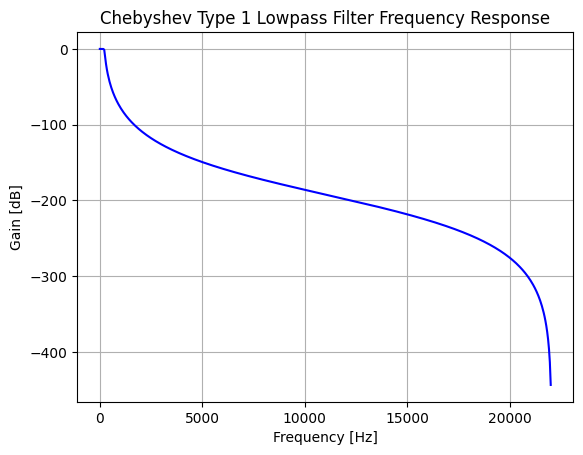

In [ ]:
# prompt: chebyshev type 1 filter using cheb1 ord
from scipy.signal import cheby1


# Parameters for the Chebyshev Type 1 filter design
fs = 44100.0
cutoff_freq = 200.0  # Cutoff frequency of the filter
order = 5  # Order of the filter
passband_ripple = 0.1  # Passband ripple in dB

# Calculate the Chebyshev Type 1 filter coefficients
b, a = cheby1(order, passband_ripple, cutoff_freq, btype='low', fs=fs)

# Plot the frequency response of the Chebyshev Type 1 filter
w, h = freqz(b, a)
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Chebyshev Type 1 Lowpass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid()
plt.show()

# Apply the Chebyshev Type 1 filter to the input signal
output_signal5 = lfilter(b, a, audio_signal)

audio_data_normalized5 = np.int16(output_signal5 * 32767)
# Save the array as a WAV file
output_file5 = 'output5.wav'
write(output_file5, sampling_rate, audio_data_normalized5)


#### Chebyshev Type 2 Filter

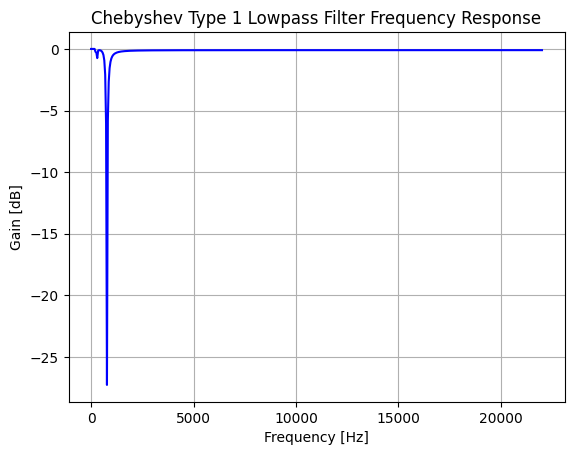

In [ ]:
# prompt: chebyshev type 2 filter using cheb2 ord
from scipy.signal import cheby2


# Parameters for the Chebyshev Type 1 filter design
fs = 44100.0
cutoff_freq = 200.0  # Cutoff frequency of the filter
order = 6  # Order of the filter
passband_ripple = 0.1  # Passband ripple in dB

# Calculate the Chebyshev Type 1 filter coefficients
b, a = cheby2(order, passband_ripple, cutoff_freq, btype='low', fs=fs)

# Plot the frequency response of the Chebyshev Type 1 filter
w, h = freqz(b, a)
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Chebyshev Type 1 Lowpass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid()
plt.show()

# Apply the Chebyshev Type 1 filter to the input signal
output_signal5 = lfilter(b, a, audio_signal)

audio_data_normalized5 = np.int16(output_signal5 * 32767)
# Save the array as a WAV file
output_file5 = 'output6.wav'
write(output_file5, sampling_rate, audio_data_normalized5)


#### Elliptic Filter

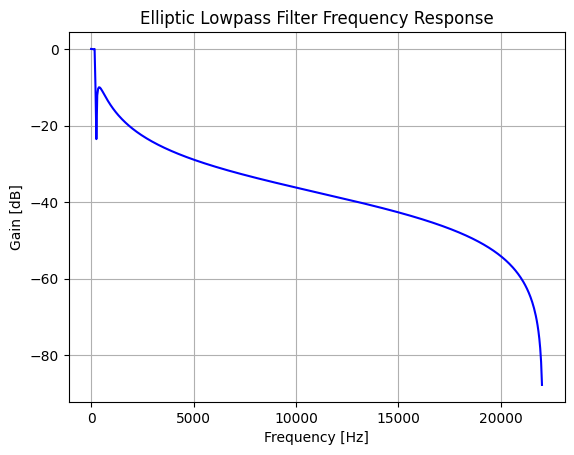

In [ ]:
# prompt: elliptic filter using ellipord
from scipy.signal import ellip

# Parameters for the elliptic filter design
fs = 44100.0
cutoff_freq = 200.0  # Cutoff frequency of the filter
order = 5  # Order of the filter
passband_ripple = 0.1  # Passband ripple in dB
stopband_attenuation = 10.0  # Stopband attenuation in dB

# Calculate the elliptic filter coefficients
b, a = ellip(order, passband_ripple, stopband_attenuation, cutoff_freq, btype='low', fs=fs)

# Plot the frequency response of the elliptic filter
w, h = freqz(b, a)
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Elliptic Lowpass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid()
plt.show()

# Apply the elliptic filter to the input signal
output_signal6 = lfilter(b, a, audio_signal)

audio_data_normalized6 = np.int16(output_signal6 * 32767)
# Save the array as a WAV file
output_file6 = 'output7.wav'
write(output_file6, sampling_rate, audio_data_normalized6)

### Implementing Filters

Now that we've seen how to design an FIR filter, the next step is to implement and FIR filter. This can be done in various ways.

#### 1. Microprocess/Microcontroller

This way likely has the most simple implementation, as we would just use the system to sample the data in real-time and output some information relatively quickly after. One downside compared to using an FPGA, is that this can have larger latency times (due to the sequential nature of the system) - this can be non-ideal and in our case, it is.

#### 2. FPGA

This way has slightly more complex implementation, as the FPGA will need some control signals as well as input data. However, it will receive input data and output data with much less latency (in comparison) - this is due to the ability to program parallelized hardware to process all the data at the same time.

For now, we will focus on implementing this design using an FPGA because of this lower latency.

#### FIR Digital Architecture
To implement the FIR filter, we can consider the generalization of the FIR filter mathematically :

$ y[n] = h[n] * x[n] $

$ y[n] = \sum_{k=-\infty}^{\infty} h[k] x[n-k]$

Consider that $h[k]$ is of finite order $M$ and that the filter is causal, then we can reduce this sum to:

$ y[n] = \sum_{k=0}^{M} h[k] x[n-k]$

Since the filter is constant, we can save the filter's taps in memory, and apply the filter to the input signal to generate the intended output.

Below is a generalized implementation of an FIR filter in hardware.

![FIR.JPG](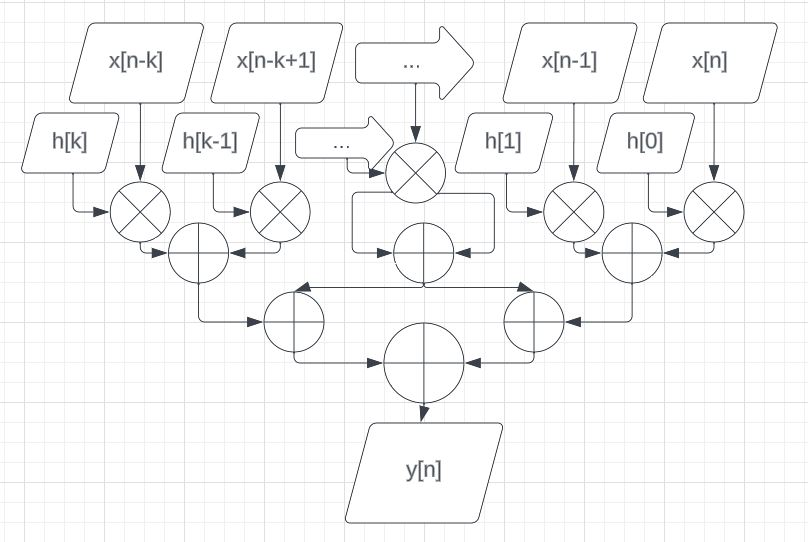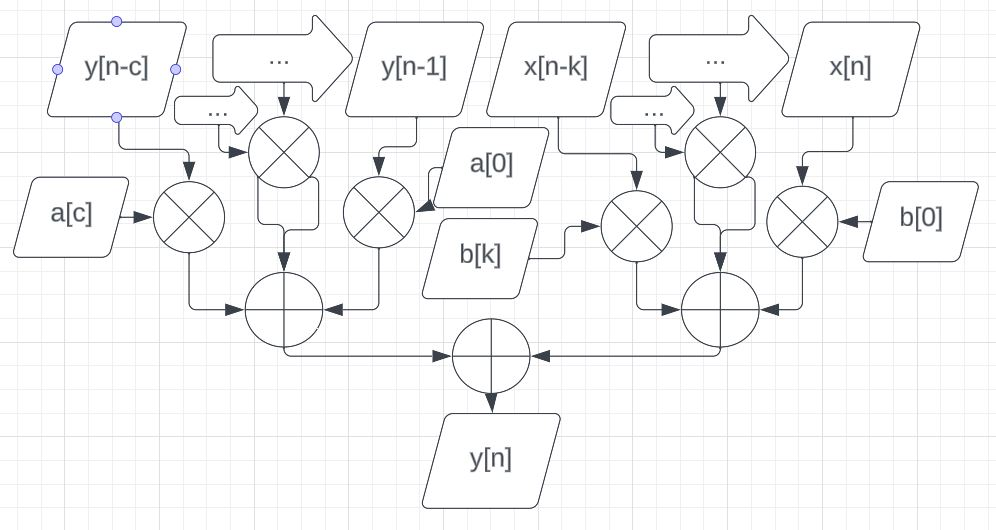)

#### IIR Digital Architecture

To implement the IIR filter, we can consider the generalization of the FIR filter mathematically :

$ y[n] * a[n] = x[n] * b[n] $

$ \sum_{k=-\infty}^{\infty} a[k] y[n-k] = \sum_{k=-\infty}^{\infty} b[k] x[n-k]$

Consider that $b[k]$ is of finite order $M$, $a[k]$ is of finite order $N$, and that the filter is causal, then we can reduce this sum to:

$ y[n] = \sum_{k=0}^{M} b[k] x[n-k] - \sum_{k=1}^{N} a[k] y[n-k]$

Since the filter is constant, we can save the filter's taps in memory, and apply the filter to the input signal to generate the intended output.

Below is a generalized implementation of an FIR filter in hardware.

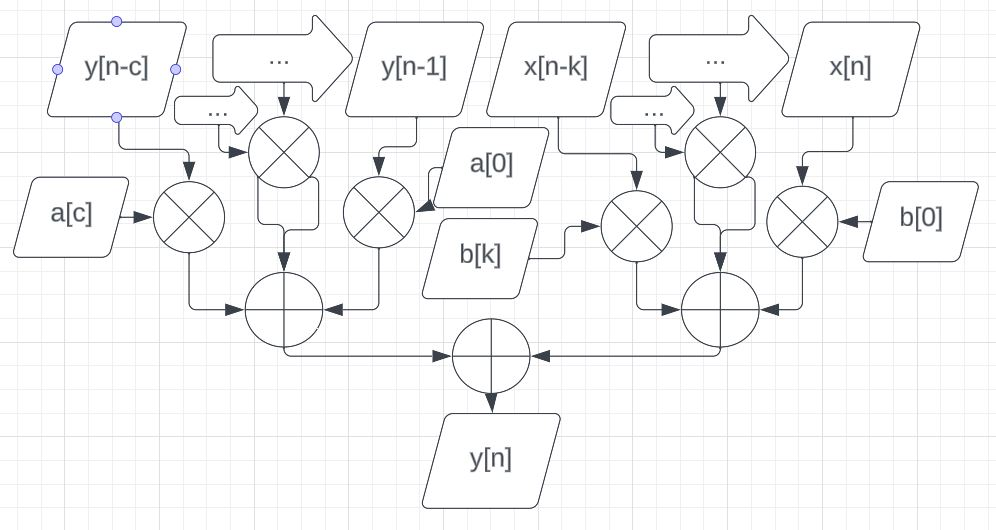

#### IIR Analog Architecture

### Communicating Data